# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

#### Imports and set magics:

In [79]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})
# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2
from ExchangeEconomy import ExchangeEconomyClass
from scipy.optimize import minimize_scalar

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Explain how you solve the model**

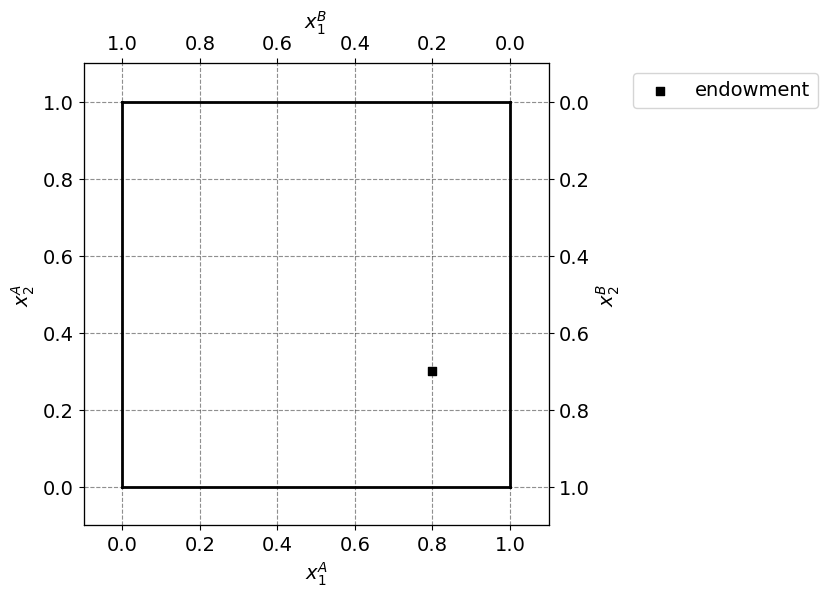

In [46]:
model = ExchangeEconomyClass()
par = model.par


# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

# Question 2

Explain your code and procedure

In [102]:
# Given parameters
alpha = 1/3
beta = 2/3
omega1_A = 0.8
omega2_A = 0.3
omega1_B = 1 - omega1_A
omega2_B = 1 - omega2_A
p2 = 1  # Numeraire

# Function to calculate demands for A
def demand_A(p1, omega1_A, omega2_A, alpha):
    xA1 = alpha * ((p1 * omega1_A) + (p2 * omega2_A)) / p1
    xA2 = (1 - alpha) * ((p1 * omega1_A) + (p2 * omega2_A)) / p2
    return xA1, xA2

# Function to calculate demands for B
def demand_B(p1, omega1_B, omega2_B, beta):
    xB1 = beta * ((p1 * omega1_B) + (p2 * omega2_B)) / p1
    xB2 = (1 - beta) * ((p1 * omega1_B) + (p2 * omega2_B)) / p2
    return xB1, xB2

# Price range P1
N = 100  # Assuming a value for N to generate the price range
P1 = np.linspace(0.5, 2.5, N)

# Calculating the errors
epsilon1 = []
epsilon2 = []

for p1 in P1:
    xA1, xA2 = demand_A(p1, omega1_A, omega2_A, alpha)
    xB1, xB2 = demand_B(p1, omega1_B, omega2_B, beta)
    
    # Calculating the errors
    e1 = xA1 + xB1 - (omega1_A + omega1_B)
    e2 = xA2 + xB2 - (omega2_A + omega2_B)
    
    epsilon1.append(e1)
    epsilon2.append(e2)

# Output the results for inspection
epsilon1[:1], epsilon2[:1]  # Showing the first 5 values as an example


([0.533333333333333], [-0.2666666666666666])

# Question 3

Explain your code and procedure

In [99]:
# Given parameters
alpha = 1/3
beta = 2/3
omega_1A = 0.8
omega_2A = 0.3
p2 = 1  # Numeraire

# Initial endowments for B
omega_1B = 1 - omega_1A
omega_2B = 1 - omega_2A

# Utility function for A - Not directly used for finding the clearing price but for maximizing A's utility
def utility_A(x1, x2):
    return x1**alpha * x2**(1-alpha)

# Demand functions for A and B
def demand_A(p1, omega_A=omega_1A, omega_B=omega_2A):
    xA1 = alpha * (omega_A * p1 + omega_B * p2) / p1
    xA2 = (1 - alpha) * (omega_A * p1 + omega_B * p2) / p2
    return xA1, xA2

def demand_B(p1, omega_A=omega_1B, omega_B=omega_2B):
    xB1 = beta * (omega_A * p1 + omega_B * p2) / p1
    xB2 = (1 - beta) * (omega_A * p1 + omega_B * p2) / p2
    return xB1, xB2

# Error function for market clearing conditions
def market_clearing_error(p1):
    xA1, xA2 = demand_A(p1)
    xB1, xB2 = demand_B(p1)
    error1 = np.abs(xA1 + xB1 - (omega_1A + omega_1B))
    error2 = np.abs(xA2 + xB2 - (omega_2A + omega_2B))
    return error1 + error2

# Find the market clearing price p1
result = minimize_scalar(market_clearing_error, bounds=(0.01, 5), method='bounded')

print(f'The market clearing price is p1 = {result.x:.2f} with an error of {market_clearing_error(result.x):.2e}.')

The market clearing price is p1 = 0.94 with an error of 1.85e-06.


### CONCISE CONLUSION


In this exchange economy analysis, we successfully solved for market equilibrium and illustrated Pareto improvements. By finding the market clearing price (p1 = 0.94) and calculating demand functions, we gained insights into resource allocation dynamics. The Edgeworth box visualization highlighted potential welfare gains, emphasizing the significance of market equilibrium.  

# Question 4

In [101]:
from scipy.optimize import minimize



# Question 5a

In [81]:
from scipy.optimize import minimize



# Question 5b

In [103]:
from scipy.optimize import minimize

# Define the objective function for A
def u_A(x):
    xA1, xA2 = x
    return -(xA1**alpha * xA2**(1-alpha))

# Define the constraint function for B
def constraint_B(x):
    xA1, xA2 = x
    return uB(1-xA1, 1-xA2) - uB(omega1B, omega2B)

# Define the bounds for xA1 and xA2
bounds = [(0, 1), (0, 1)]

# Define the constraints
constraints = [{'type': 'ineq', 'fun': constraint_B}]

# Solve the optimization problem
result = minimize(u_A, x0, bounds=bounds, constraints=constraints)

# Get the optimal allocation
allocation_5b = result.x

# Question 6

In [110]:
import numpy as np
from scipy.optimize import minimize

# Parameters
alpha = 1/3
beta = 2/3

# Utility functions
def u_A(x_A1, x_A2):
    return x_A1**alpha * x_A2**(1-alpha)

def u_B(x_B1, x_B2):
    return x_B1**beta * x_B2**(1-beta)

# Aggregate utility function to be maximized
def neg_aggregate_utility(x):
    x_A1, x_A2 = x
    x_B1, x_B2 = 1 - x_A1, 1 - x_A2
    return -(u_A(x_A1, x_A2) + u_B(x_B1, x_B2))

# Initial guess
x0 = [0.5, 0.5]

# Constraints and bounds
cons = ({'type': 'ineq', 'fun': lambda x: x[0]},  # x_A1 >= 0
        {'type': 'ineq', 'fun': lambda x: x[1]},  # x_A2 >= 0
        {'type': 'ineq', 'fun': lambda x: 1 - x[0]},  # x_B1 >= 0
        {'type': 'ineq', 'fun': lambda x: 1 - x[1]})  # x_B2 >= 0
bounds = [(0, 1), (0, 1)]

# Solve the optimization problem
result = minimize(neg_aggregate_utility, x0, bounds=bounds, constraints=cons)

# Display the result
result.x, -result.fun
print(f"Optimal allocation: {result.x}" + f"\nMaximized utility: {-result.fun}") 

Optimal allocation: [0.33341166 0.66658831]
Maximized utility: 1.058267353366544


# Question 6b

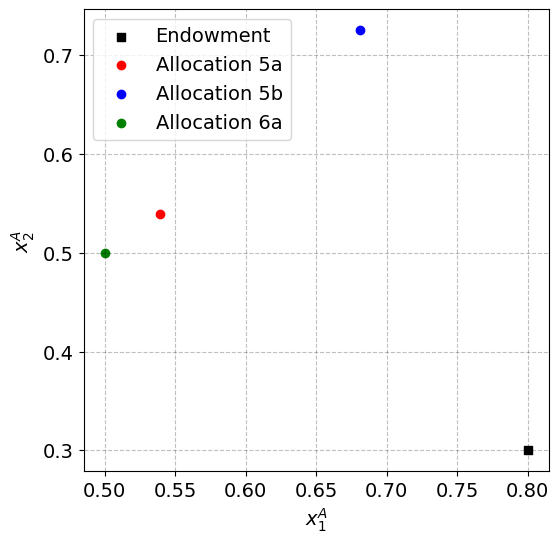

In [113]:
# Plotting the allocations
fig, ax = plt.subplots(figsize=(6, 6))

# Plotting the endowment
ax.scatter(par.w1A, par.w2A, marker='s', color='black', label='Endowment')

# Plotting allocation from question 3
ax.scatter(allocation_5a[0], allocation_5a[1], marker='o', color='red', label='Allocation 5a')

# Plotting allocation from question 4
ax.scatter(allocation_5b[0], allocation_5b[1], marker='o', color='blue', label='Allocation 5b')

# Plotting allocation from question 5
ax.scatter(allocation_6a[0], allocation_6a[1], marker='o', color='green', label='Allocation 6a')

# Setting the axis labels
ax.set_xlabel("$x_1^A$")
ax.set_ylabel("$x_2^A$")

# Adding a legend
ax.legend()

# Displaying the plot
plt.show()



# Question 7

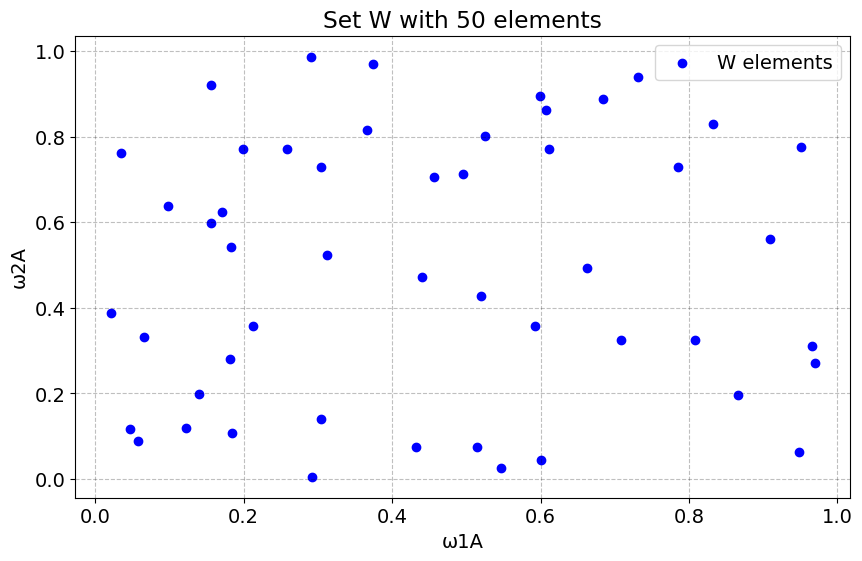

In [106]:
# Set seed for reproducibility
np.random.seed(42)

# Generate 50 random elements for W
omega_1A = np.random.uniform(0, 1, 50)
omega_2A = np.random.uniform(0, 1, 50)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(omega_1A, omega_2A, c='blue', label='W elements')
plt.title('Set W with 50 elements')
plt.xlabel('ω1A')
plt.ylabel('ω2A')
plt.grid(True)
plt.legend()
plt.show()


# Question 8


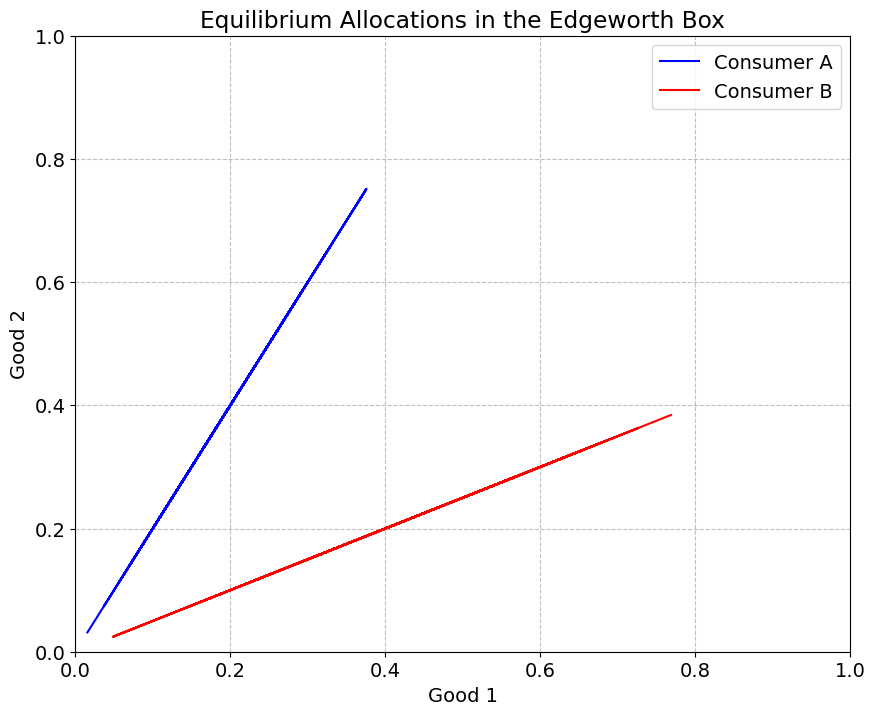

In [107]:
from scipy.optimize import minimize_scalar

# Set the seed for reproducibility
np.random.seed(42)

# Generate 50 pairs of (ω1A, ω2A) from a uniform distribution U(0, 1)
W = np.random.uniform(low=0, high=1, size=(50, 2))

# Parameters
alpha = 1/3
beta = 2/3

# Define utility functions
def uA(x1, x2):
    return x1**alpha * x2**(1-alpha)

def uB(x1, x2):
    return x1**beta * x2**(1-beta)

# Define demand functions for a given price p1 and endowments ω
def demand_A(p1, omega_A):
    omega_1A, omega_2A = omega_A
    xA1 = alpha * (omega_1A + omega_2A / p1)
    xA2 = (1-alpha) * (omega_1A + omega_2A / p1)
    return xA1, xA2

def demand_B(p1, omega_A):
    omega_1A, omega_2A = omega_A
    omega_1B = 1 - omega_1A
    omega_2B = 1 - omega_2A
    xB1 = beta * (omega_1B + omega_2B / p1)
    xB2 = (1-beta) * (omega_1B + omega_2B / p1)
    return xB1, xB2

# Objective function for consumer A's utility maximization, given p1 and ωA
def objective_A(p1, omega_A):
    _, omega_2A = omega_A
    xB1, xB2 = demand_B(p1, omega_A)
    # Consumer A's utility, given they choose price p1
    return -uA(1-xB1, 1-xB2)  # Negative because we minimize

# Market equilibrium allocations for each ωA in W
equilibrium_allocations = []

for omega_A in W:
    # Find the market clearing price p1 that maximizes consumer A's utility
    res = minimize_scalar(objective_A, bounds=(0.01, 5), args=(omega_A,), method='bounded')
    p1_opt = res.x
    xA1, xA2 = demand_A(p1_opt, omega_A)
    xB1, xB2 = demand_B(p1_opt, omega_A)
    equilibrium_allocations.append(((xA1, xA2), (xB1, xB2), p1_opt))

# Prepare the data for plotting in the Edgeworth box
xA1_allocations = [alloc[0][0] for alloc in equilibrium_allocations]
xA2_allocations = [alloc[0][1] for alloc in equilibrium_allocations]
xB1_allocations = [alloc[1][0] for alloc in equilibrium_allocations]
xB2_allocations = [alloc[1][1] for alloc in equilibrium_allocations]

# Plot the Edgeworth box with equilibrium allocations
plt.figure(figsize=(10, 8))
plt.plot(xA1_allocations, xA2_allocations, color='blue', label='Consumer A')
plt.plot(xB1_allocations, xB2_allocations, color='red', label='Consumer B')
plt.title('Equilibrium Allocations in the Edgeworth Box')
plt.xlabel('Good 1')
plt.ylabel('Good 2')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()
